<a href="https://colab.research.google.com/github/bhavinhirapara/Customer-Segmentations/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load required dipendency**

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load data**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Perform EDA**

In [20]:
data.rename(columns={'Genre':'Gender'},inplace=True)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
data.shape

(200, 5)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [25]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [30]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [35]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(wspace=0.5,hspace=0.5)
  sns.displot(data[x],bins=20)
  plt.title("Distplot of {}".format(x))

  plt.show()


In [39]:
data.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


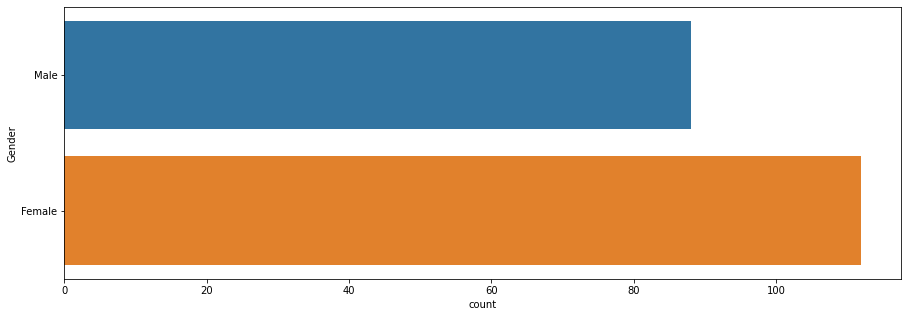

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,y = 'Gender')

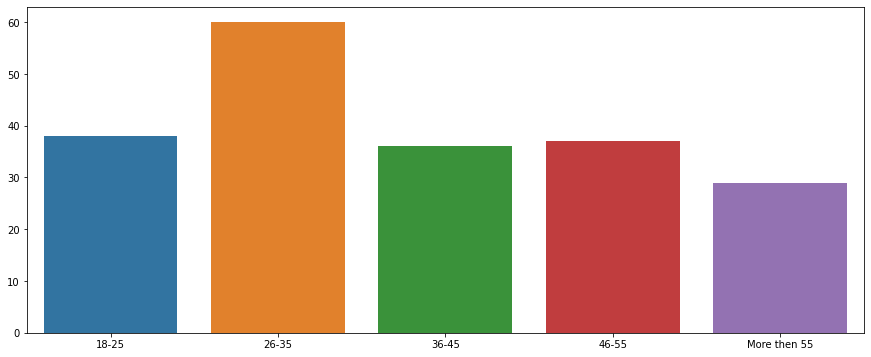

In [45]:
age_18_25 = data.Age[(data.Age>=18)&(data.Age<=25)]
age_26_35 = data.Age[(data.Age>=26)&(data.Age<=35)]
age_36_45 = data.Age[(data.Age>=36)&(data.Age<=45)]
age_46_55 = data.Age[(data.Age>=46)&(data.Age<=55)]
age_55_more = data.Age[(data.Age>55)]

x = ['18-25','26-35','36-45','46-55','More then 55']
y = [len(age_18_25),len(age_26_35),len(age_36_45),len(age_46_55),len(age_55_more)]
plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y)

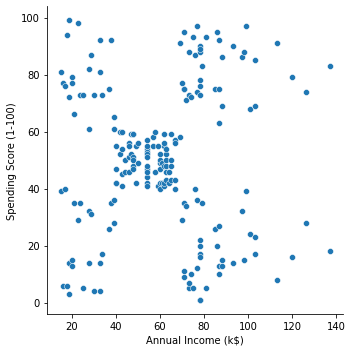

In [46]:
sns.relplot(data = data, x ='Annual Income (k$)',y="Spending Score (1-100)" )

**Finding best number of cluster using Albow method**

Text(0, 0.5, 'WCSS')

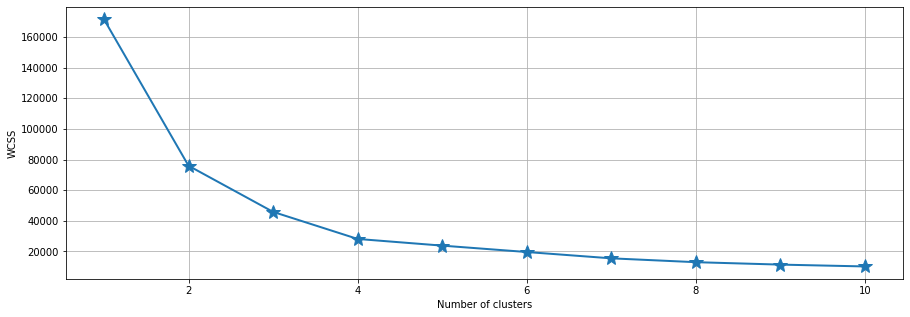

In [57]:
from sklearn.cluster import KMeans
X1 = data.loc[:,['Age','Spending Score (1-100)']].values
wcss=[]

for k in range(1,11):
  kmean = KMeans(n_clusters=k,init='k-means++')
  kmean.fit(X1)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,marker='*',ms=15)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

As per the above figure number of cluster 4 is good for our model

**Make clusters**

In [97]:
kmean = KMeans(n_clusters=4)

label = kmean.fit_predict(X1)

print(label)

[0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 0 0 1 3 0 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1
 3 1 3 2 3 2 0 1 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 3 0 3 2 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 2 3
 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


Find centroid of cluster

In [98]:
print(kmean.cluster_centers_)

[[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [30.1754386  82.35087719]]


plot cluster with its centroid

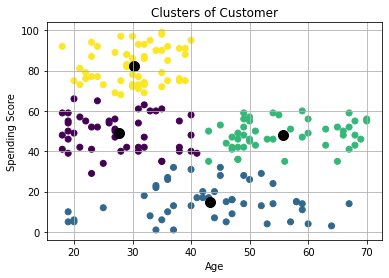

In [100]:
plt.scatter(X1[:,0],X1[:,1],c = kmean.labels_)
plt.scatter(x = kmean.cluster_centers_[:,0],y = kmean.cluster_centers_[:,1],c='black',s=100)
plt.title("Clusters of Customer")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.grid()

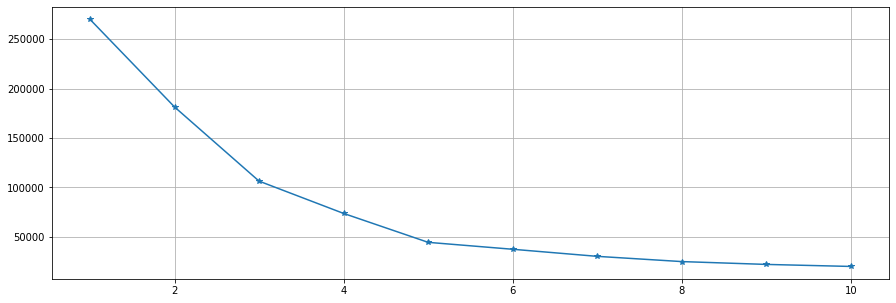

In [102]:
x2 = data.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
swcc2=[]

for k in range(1,11):
  kmean = KMeans(n_clusters=k,init="k-means++")
  kmean.fit(x2)
  swcc2.append(kmean.inertia_)
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(range(1,11),swcc2,marker='*')
  

In [103]:
kmean = KMeans(n_clusters=5)
labels = kmean.fit_predict(x2)
print(labels)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 0 4 2 4 2 4 0 4 2 4 2 4 2 4 2 4 0 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


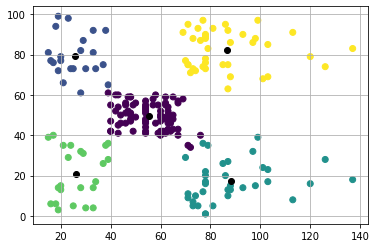

In [104]:
plt.scatter(x2[:,0],x2[:,1],c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='black')
plt.grid()

**Clustering using 3 features**

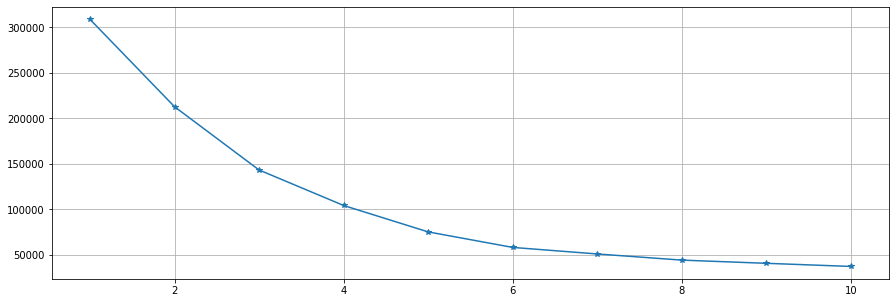

In [115]:
X3 = data.iloc[:,1:].values
swcc3 =[]

for k in range(1,11):
  kmean_final = KMeans(n_clusters=k,init='k-means++')
  kmean_final.fit(X3)
  swcc3.append(kmean_final.inertia_)
plt.figure(figsize=(15,5))
plt.plot(range(1,11),swcc3,marker='*')

plt.grid()
  

In [116]:
kmean_final = KMeans(n_clusters=5)
label =  kmean_final.fit_predict(X3)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 4 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 4 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [117]:
print(kmean_final.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [40.32432432 87.43243243 18.18918919]
 [32.69230769 86.53846154 82.12820513]
 [25.27272727 25.72727273 79.36363636]
 [43.12658228 54.82278481 49.83544304]]


**we drow 3D scatter plot**

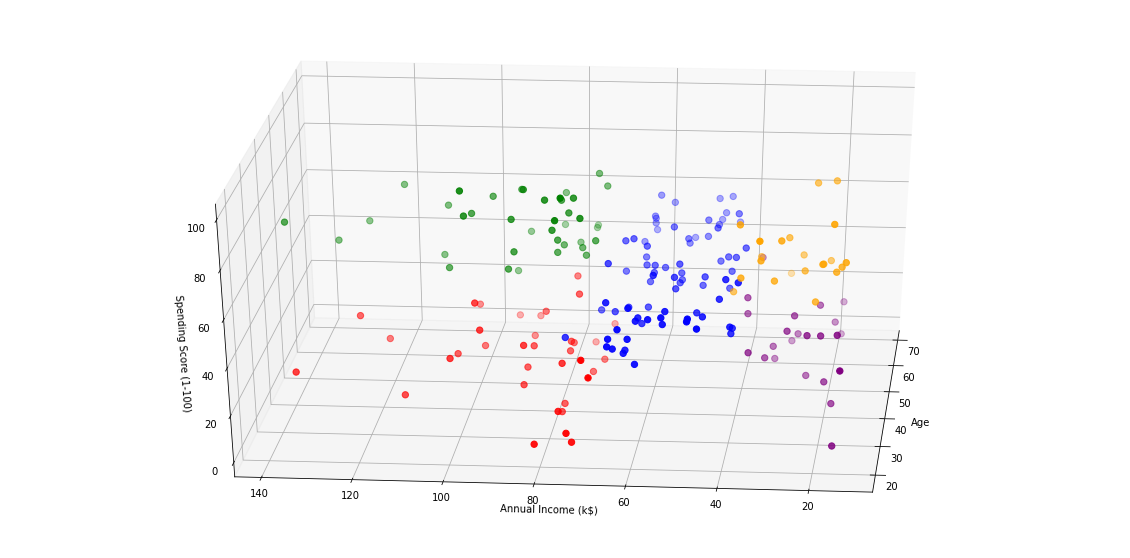

In [142]:

clusters = kmean_final.fit_predict(X3)
data['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data.Age[data.label==0],data['Annual Income (k$)'][data.label==0],data['Spending Score (1-100)'][data.label==0],c="blue",s=40)
ax.scatter(data.Age[data.label==1],data['Annual Income (k$)'][data.label==1],data['Spending Score (1-100)'][data.label==1],c="green",s=40)
ax.scatter(data.Age[data.label==2],data['Annual Income (k$)'][data['label']==2],data['Spending Score (1-100)'][data['label']==2],c='red',s=40)
ax.scatter(data['Age'][data['label']==3],data['Annual Income (k$)'][data.label==3],data['Spending Score (1-100)'][data['label']==3],c = 'orange',s=40)
ax.scatter(data['Age'][data['label']==4],data['Annual Income (k$)'][data.label==4],data['Spending Score (1-100)'][data['label']==4],c = 'purple',s=40)
plt.xlabel("Age")
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.view_init(30,185)

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,4
1,Male,21,15,81,1
2,Female,20,16,6,4
3,Female,23,16,77,1
4,Female,31,17,40,4
